In [3]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.datasets import mnist
import numpy as np


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[..., np.newaxis], x_test[..., np.newaxis]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [5]:
import matplotlib.pyplot as plt

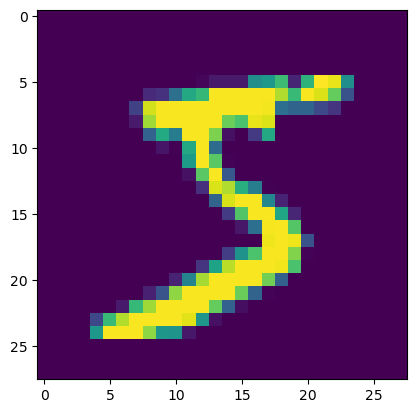

In [6]:
plt.imshow(x_train[0,:,:,0])

In [7]:
x_train, x_test = x_train / 255.0, x_test/255.0

In [8]:
num_classes = 10
epochs = 30
batch_size =32


In [9]:
class LeNet5(Model):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.conv1 = Conv2D(6, kernel_size=(5,5), activation='relu', padding='same')
        self.conv2 = Conv2D(16, kernel_size=(5,5), activation='relu')
        self.max_pool = MaxPooling2D(pool_size=(2,2))
        self.flatten = Flatten()
        self.dense1 = Dense(120, activation='relu')
        self.dense2 = Dense(84, activation='relu')
        self.dense3 = Dense(num_classes, activation='softmax')

    def call(self, input_data):
        x = self.max_pool(self.conv1(input_data))
        x = self.max_pool(self.conv2(x))
        x = self.flatten = Flatten()
        x = self.dense3(self.dense2(self.dense1(x)))

        return x

In [10]:
model = LeNet5(num_classes)
model.compile(optimizer='sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
callbacks = [EarlyStopping(patience=3, monitor='val_loss'), 
             TensorBoard(log_dir='./logs', histogram_freq=1)]

In [51]:
model.fit(x_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_data=(x_test, y_test), 
          callbacks=callbacks)

FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} ./logs is not a directory [Op:CreateSummaryFileWriter] name: 

In [12]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input

In [13]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[...,np.newaxis]
x_test = x_test[...,np.newaxis]
    
x_train, x_test = x_train / 255.0, x_test/255.0

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat', 'Sandal', 'Shirt','Sneakers', 'Bag', 'Ankle boot']


In [15]:
def build_model():
    model = Sequential()

    input = Input(shape=(28,28,1))
    output = Conv2D(filters=32, kernel_size=(3,3))(input)
    output = Conv2D(filters=64, kernel_size=(3,3))(output)
    output = Conv2D(filters=64, kernel_size=(3,3))(output)
    output = Flatten(   )(output)
    output = Dense(128, activation='relu')(output)
    output = Dense(64, activation='relu')(output)
    output = Dense(10, activation='softmax')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']


    )
    return model

model_1 = build_model()
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,029,706 (15.37 MB)

 Trainable params: 4,029,706 (15.37 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
hist_1 = model_1.fit(x_train, y_train, epochs=25, validation_split=0.3, batch_size=128)

Epoch 1/25
 12/329 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - acc: 0.3258 - loss: 1.9457

KeyboardInterrupt: 

In [17]:
hist_1.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_1.history['loss'], 'b--', label ='loss')
plt.plot(hist_1.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

plt.subplot(1,2,1)
plt.plot(hist_1.history['acc'], 'b--', label ='accuracy')
plt.plot(hist_1.history['val_acc'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

NameError: name 'hist_1' is not defined

In [18]:
model_1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.6567 - loss: 0.9298


[0.9356932640075684, 0.6567000150680542]

In [19]:
def build_model2():
    model = Sequential()

    input = Input(shape=(28,28,1))
    output = Conv2D(filters=32, kernel_size=(3,3))(input)
    output = MaxPool2D(strides=(2,2))(output)

    output = Conv2D(filters=64, kernel_size=(3,3))(output)
    output = Dropout(0.4)(output)
    output = MaxPool2D(strides=(2,2))(output)

    output = Conv2D(filters=64, kernel_size=(3,3))(output)
    output = Dropout(0.4)(output)
    output = MaxPool2D(strides=(2,2))(output)

    output = Flatten()(output)

    output = Dense(128, activation='relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(64, activation='relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(10, activation='softmax')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']


    )
    return model

model_2 = build_model2()
model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,970 (285.04 KB)

 Trainable params: 72,970 (285.04 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
hist_2 = model_2.fit(x_train, y_train, epochs=40, validation_split=0.3, batch_size=128)

Epoch 1/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - acc: 0.4396 - loss: 1.5049 - val_acc: 0.7521 - val_loss: 0.6821
Epoch 2/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - acc: 0.7272 - loss: 0.7486 - val_acc: 0.7797 - val_loss: 0.6216
Epoch 3/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - acc: 0.7664 - loss: 0.6581 - val_acc: 0.7952 - val_loss: 0.5669
Epoch 4/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - acc: 0.7805 - loss: 0.6176 - val_acc: 0.8065 - val_loss: 0.5458
Epoch 5/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - acc: 0.7966 - loss: 0.5828 - val_acc: 0.8067 - val_loss: 0.5224
Epoch 6/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - acc: 0.8140 - loss: 0.5361 - val_acc: 0.8132 - val_loss: 0.5074
Epoch 7/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - acc: 0.8175 - loss: 0.5328 - val_acc: 0.8195 - val_loss: 0.5015
Epoch 8/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - acc: 0.8252 - loss: 0.5023 - val_acc: 0.8302 - val_loss: 0.4700
Epoch 9/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/

NameError: name 'hist_2' is not defined

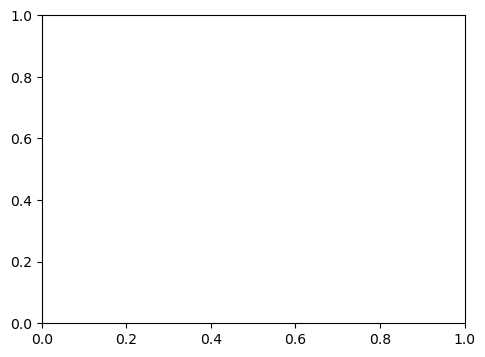

In [20]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_2.history['loss'], 'b--', label ='loss')
plt.plot(hist_2.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

plt.subplot(1,2,1)
plt.plot(hist_2.history['acc'], 'b--', label ='accuracy')
plt.plot(hist_2.history['val_acc'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [21]:
image_generator = ImageDataGenerator(
    rotation_range=10, zoom_range=0.2,
    shear_range =0.6, width_shift_range=0.1,
    height_shift_range=0.1, horizontal_flip=True,
    vertical_flip=False
)

augment_size=200

print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [23]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1, 28, 28, 1),np.zeros(augment_size), batch_size=augment_size, shuffle=False)
batch = next(x_augment)
print(batch)

(array([[[[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        ...,

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,


In [5]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')

import numpy as np

In [7]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

print(x_train_full.shape, y_train_full.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [8]:
print(y_test[5])

[6]


C:\Users\leehw\AppData\Local\Temp\ipykernel_18812\3493901812.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train_full[i])])


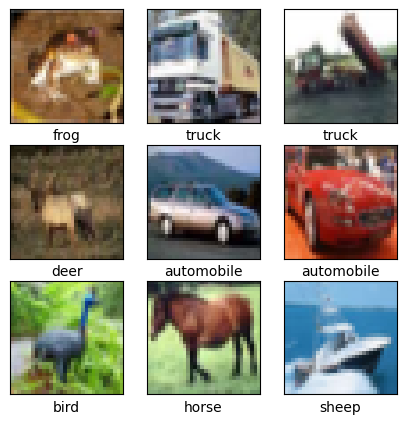

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog','frog','horse','sheep','truck']

random_idx = np.random.randint(50000, size=9)

plt.figure(figsize=(5,5))
for i , idx in enumerate(random_idx):
    plt.subplot(3,3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_full[i])
    plt.xlabel(class_names[int(y_train_full[i])])

plt.show()

In [13]:
x_mean = np.mean(x_train_full, axis=(0,1,2))
x_std = np.std(x_train_full, axis=(0,1,2))

x_train_full = (x_train_full - x_mean)/ x_std
x_test = (x_test-x_mean) / x_std

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2)

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [21]:
def model_build():
    model = Sequential()

    input = Input(shape=(32,32,3))

    output = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

    output = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

    output = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

    output = Flatten()(output)
    output = Dense(256, activation='relu')(output)
    output = Dense(128, activation='relu')(output)
    output = Dense(10, activation='softmax')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer = Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [22]:
model = model_build()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 651,978 (2.49 MB)

 Trainable params: 651,978 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(x_train, y_train, epochs=30, batch_size=256, validation_data=(x_val, y_val))

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.2741 - loss: 2.0340 - val_accuracy: 0.4322 - val_loss: 1.6142
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.4446 - loss: 1.5605 - val_accuracy: 0.4865 - val_loss: 1.4393
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.5015 - loss: 1.4043 - val_accuracy: 0.5263 - val_loss: 1.3397
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.5398 - loss: 1.3056 - val_accuracy: 0.5591 - val_loss: 1.2656
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.5699 - loss: 1.2271 - val_accuracy: 0.5615 - val_loss: 1.2409
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.5869 - loss: 1.1866 - val_accuracy: 0.5889 - val_loss: 1.1830
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.6020 - loss: 1.1367 - val_accuracy: 0.6072 - val_loss: 1.1454
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.6175 - loss: 1.0942 - val_accu

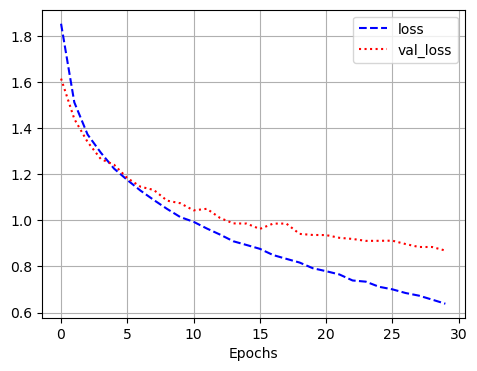

KeyError: 'validation_accuracy'

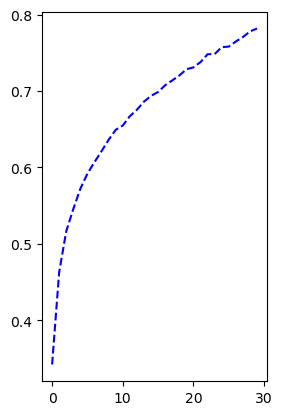

In [30]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b--', label ='loss')
plt.plot(history.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'b--', label ='accuracy')
plt.plot(history.history['validation_accuracy'], 'r:', label='validation_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [31]:
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

vggnet = VGG19(include_top= True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step


In [33]:
!wget -O dog.jpg https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [34]:
img = image.load_img('dog.jpg', target_size=(224,224))
plt.imshow(img)
x = image.img_to_array(img)
x = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))
x = preprocess_input(x)

preds = vggnet.predict(x)
print(decode_predictions(preds))

FileNotFoundError: [Errno 2] No such file or directory: 'dog.jpg'